In [1]:
import networkx as nx

In [7]:
G = nx.read_gml('proofwikidefs_la.gml','name') # make sure this gml file is in the same folder!

## Basics

First off, take a look at this Introduction to Networkx: [https://networkx.org/documentation/stable/reference/introduction.html#](https://networkx.org/documentation/stable/reference/introduction.html#)

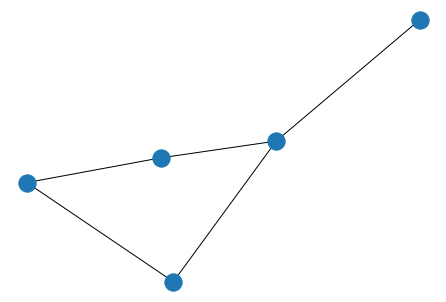

In [8]:
N = nx.Graph()
N.add_edge('A','B',weight=3)
N.add_edge('A','C')
N.add_edge('C','D')
N.add_edge('B','D')
N.add_edge('B','E')
nx.draw(N)

In [16]:
N['A']['B']['weight']

12


## Looping over nodes

We'll start by looping over all the nodes of the network and will confirm equation (6.20), which says that summing the degrees over the network equals twice the number of edges: $2m = \sum_{i=1}^n k_i$

In [5]:
cum_degree = 0
m = G.number_of_edges()
for u in G:  # OR for u in G.nodes():
    cum_degree = cum_degree + G.degree(u)
print('Same:  %i =?= %i' % (cum_degree, 2*m) )

Same:  2066 =?= 2066


### Looping over a node's neighbors

In this case we'll loop over the neighbors of the node named "Identity Matrix" and print out information about the edges between these neighbors.

In [6]:
u = 'Identity Matrix'
for v in G[u]:
    if G.has_edge(u,v):
        print('The edge (%s , %s) has weight %i' % (u,v,G[u][v]['weight']))
    if G.has_edge(v,u):
        print('The edge (%s , %s) has weight %i' % (v,u,G[v][u]['weight']))

The edge (Identity Matrix , Identity Matrix/Definition 1) has weight 1
The edge (Identity Matrix , Matrix Space) has weight 1
The edge (Identity Matrix , Order of Square Matrix) has weight 1
The edge (Identity Matrix , Square Matrix) has weight 1
The edge (Identity Matrix , Diagonal Element) has weight 1
The edge (Diagonal Element , Identity Matrix) has weight 1
The edge (Identity Matrix , Identity Matrix/Definition 2) has weight 1
The edge (Identity Matrix , Ones Matrix) has weight 1
The edge (Identity Matrix , Trace of Matrix) has weight 1
The edge (Trace of Matrix , Identity Matrix) has weight 1
The edge (Identity Matrix , Principal Diagonal) has weight 1
The edge (Principal Diagonal , Identity Matrix) has weight 1
The edge (Identity Matrix , Invertible Matrix) has weight 1
The edge (Invertible Matrix , Identity Matrix) has weight 1


*Notice that these could be in or out neighbors and sometimes both!*

Now let's loop over just the out-neighbors (successors) instead:

In [7]:
u = 'Identity Matrix'
for v in G.successors(u):
    print('Node %s has degree %i' % (v,G.degree(v)))

Node Identity Matrix/Definition 1 has degree 7
Node Matrix Space has degree 20
Node Order of Square Matrix has degree 6
Node Square Matrix has degree 46
Node Diagonal Element has degree 11
Node Identity Matrix/Definition 2 has degree 1
Node Ones Matrix has degree 3
Node Trace of Matrix has degree 7
Node Principal Diagonal has degree 4
Node Invertible Matrix has degree 6


### Looping over pairs of nodes

In [8]:
import itertools

for u,v in itertools.combinations(G.nodes(),2):
    if G.degree(u) == G.degree(v) and G.degree(u) > 20:
        print('These nodes have the same degree: %s and %s' % ( u , v ) )

These nodes have the same degree: Vector (Euclidean Space) and R-Algebraic Structure
These nodes have the same degree: Dimension of Vector Space and Determinant
These nodes have the same degree: Dimension of Vector Space and Identity Matrix
These nodes have the same degree: Dimension of Vector Space and Unitary Module
These nodes have the same degree: Determinant and Identity Matrix
These nodes have the same degree: Determinant and Unitary Module
These nodes have the same degree: Identity Matrix and Unitary Module


## Set Manipulations

To help with the cocitation where you need to see if two arrays have any elements in common, we can use sets to do this easily. 
> check out more about sets here: [https://docs.python.org/2/library/sets.html](https://docs.python.org/2/library/sets.html)

In [9]:
numbers = [0,1,2,3,4,5,6,7,8,9] # this is a list
evens = [2,4,6,8] # list
odds = [1,3,5,7,9] # list
other = [1,4,5,6,8] # list

numbers_set = set(numbers) # made another data structure that is a set, with all the same elements of the list.
print(len(numbers))
print(len(numbers_set))
print(2 in evens)
print(2 in odds)
print(numbers_set.intersection(set(evens)))
print(set(evens).intersection(set(other)))
print(set(evens).intersection(set(odds)))
print(set(other).union(set(evens)))

10
10
True
False
{8, 2, 4, 6}
{8, 4, 6}
set()
{1, 2, 4, 5, 6, 8}


## Some Sample Simple "Algorithms"

**Prompt:** Print out the cumulative weight of the incoming and outgoing edges of each node (only edges with positive weight)

In [83]:
for u in G.nodes():
    in_weight = 0
    for v in G.predecessors(u):  # v --> u
        if G[v][u]['weight'] > 0:
            in_weight = in_weight + G[v][u]['weight']
    out_weight = 0
    for v in G.successors(u):  # u --> v
        if G[u][v]['weight'] > 0:
            out_weight = out_weight + G[u][v]['weight']
    print('Node [%s] %i  %i' % (u,in_weight,out_weight))

**Prompt:** Write a function that creates a directed path in which node 1->2->3->...->n-1->n

In [80]:
def my_path_network(n):
    P = nx.DiGraph()
    for u in range(1,n+1):
        P.add_node(u)
    for u in range(1,n):
        P.add_edge(u,u+1)
    return P

G = my_path_network(8)
print('=======')
print(G.number_of_nodes(),G.number_of_edges())

8 7


## Example Network from Slides

Here is the example network used in the Class 2 slides to demonstrate cocitation and bibliographic coupling.

In [67]:
G = nx.DiGraph()
G.add_nodes_from(range(1,8))
G.add_edge(1,7)
G.add_edge(3,1)
G.add_edge(3,4)
G.add_edge(4,1)
G.add_edge(4,2)
G.add_edge(4,3)
G.add_edge(5,1)
G.add_edge(5,2)
G.add_edge(6,2)
G.add_edge(7,2)